# **Estudio sobre la educacion y su relacion con el exito laboral**

***Autor***: Salvador Chacon

## **Definicion del problema**

El siguiente DataSet trata acerca de la relación entre el rendimiento académico y el éxito profesional en los Estados Unidos. Incluye registros de los antecedentes educativos, las habilidades y los resultados profesionales de los estudiantes con el objetivo de encontrar una relacion entre el exito laboral y la educacion.

Preguntas como:

* ¿Los estudiantes con más pasantías o certificaciones consiguen mejores salarios o más oportunidades?
* ¿Los estudiantes con altos puntajes en SAT y GPA tienen más éxito en términos de empleo y satisfacción?
* ¿Cómo influye el ranking de la universidad en el salario inicial y la cantidad de ofertas de trabajo?
* ¿Las habilidades blandas y el networking tienen un impacto significativo en las oportunidades de empleo?

Serviran de guia para el analisis de este DataSet, con la intencion de responder a hipotesis como:

* Los estudiantes de universidades mejor rankeadas reciben mayores salarios iniciales
* Los estudiantes con más pasantías y certificaciones tienen más ofertas de trabajo.
* Los graduados de carreras técnicas (por ejemplo, Ciencias de la Computación) tienen un salario inicial más alto en comparación con los graduados de carreras humanas.
* El salario inicial entre hombres y mujeres graduados es aproximadamente igual


## **Carga y preparacion de datos**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
url = "https://raw.githubusercontent.com/salvador551998/Salvador-Chacon-/main/Educacion.xlsx"

In [3]:
Educacion_df = pd.read_excel(url , engine='openpyxl')

### **Exploracion inicial**

In [5]:
Educacion_df.describe()

,tudent_ID,Age,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Work_Life_Balance
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2500.500000,23.442200,273.333200,1253.832000,504.335600,275.073000,1.982200,4.562800,2.512200,5.546000,5.538000,2.488800,5.056354e+05,5.578000,3.015800,5.482400
std,1443.520003,3.473712,97.419568,203.228954,291.060011,97.423859,1.408219,2.872927,1.703183,2.851159,2.850084,1.711859,1.449496e+05,2.871997,1.417446,2.883427
min,1.000000,18.000000,20.000000,900.000000,1.000000,20.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.500000e+05,1.000000,1.000000,1.000000
25%,1250.750000,20.000000,234.750000,1076.000000,256.000000,235.000000,1.000000,2.000000,1.000000,3.000000,3.000000,1.000000,4.020000e+05,3.000000,2.000000,3.000000
50%,2500.500000,23.000000,288.000000,1257.000000,501.500000,292.000000,2.000000,5.000000,3.000000,6.000000,6.000000,2.000000,5.030000e+05,6.000000,3.000000,6.000000
75%,3750.250000,26.000000,344.000000,1432.000000,759.000000,346.000000,3.000000,7.000000,4.000000,8.000000,8.000000,4.000000,6.050000e+05,8.000000,4.000000,8.000000
max,5000.000000,29.000000,399.000000,1600.000000,1000.000000,399.000000,4.000000,9.000000,5.000000,10.000000,10.000000,5.000000,1.010000e+06,10.000000,5.000000,10.000000


In [6]:
Educacion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tudent_ID              5000 non-null   int64 
 1   Age                    5000 non-null   int64 
 2   Gender                 5000 non-null   object
 3   High_School_GPA        5000 non-null   int64 
 4   SAT_Score              5000 non-null   int64 
 5   University_Ranking     5000 non-null   int64 
 6   University_GPA         5000 non-null   int64 
 7   Field_of_Study         5000 non-null   object
 8   Internships_Completed  5000 non-null   int64 
 9   Projects_Completed     5000 non-null   int64 
 10  Certifications         5000 non-null   int64 
 11  Soft_Skills_Score      5000 non-null   int64 
 12  Networking_Score       5000 non-null   int64 
 13  Job_Offers             5000 non-null   int64 
 14  Starting_Salary        5000 non-null   int64 
 15  Career_Satisfaction  

In [7]:
#Se remueve la columna de ID ya que no impacta en el analisis y entorpece los calculos.
Educacion_df.drop(columns=["tudent_ID"], inplace= True)

### **Analisis de outliers en el DataSet**

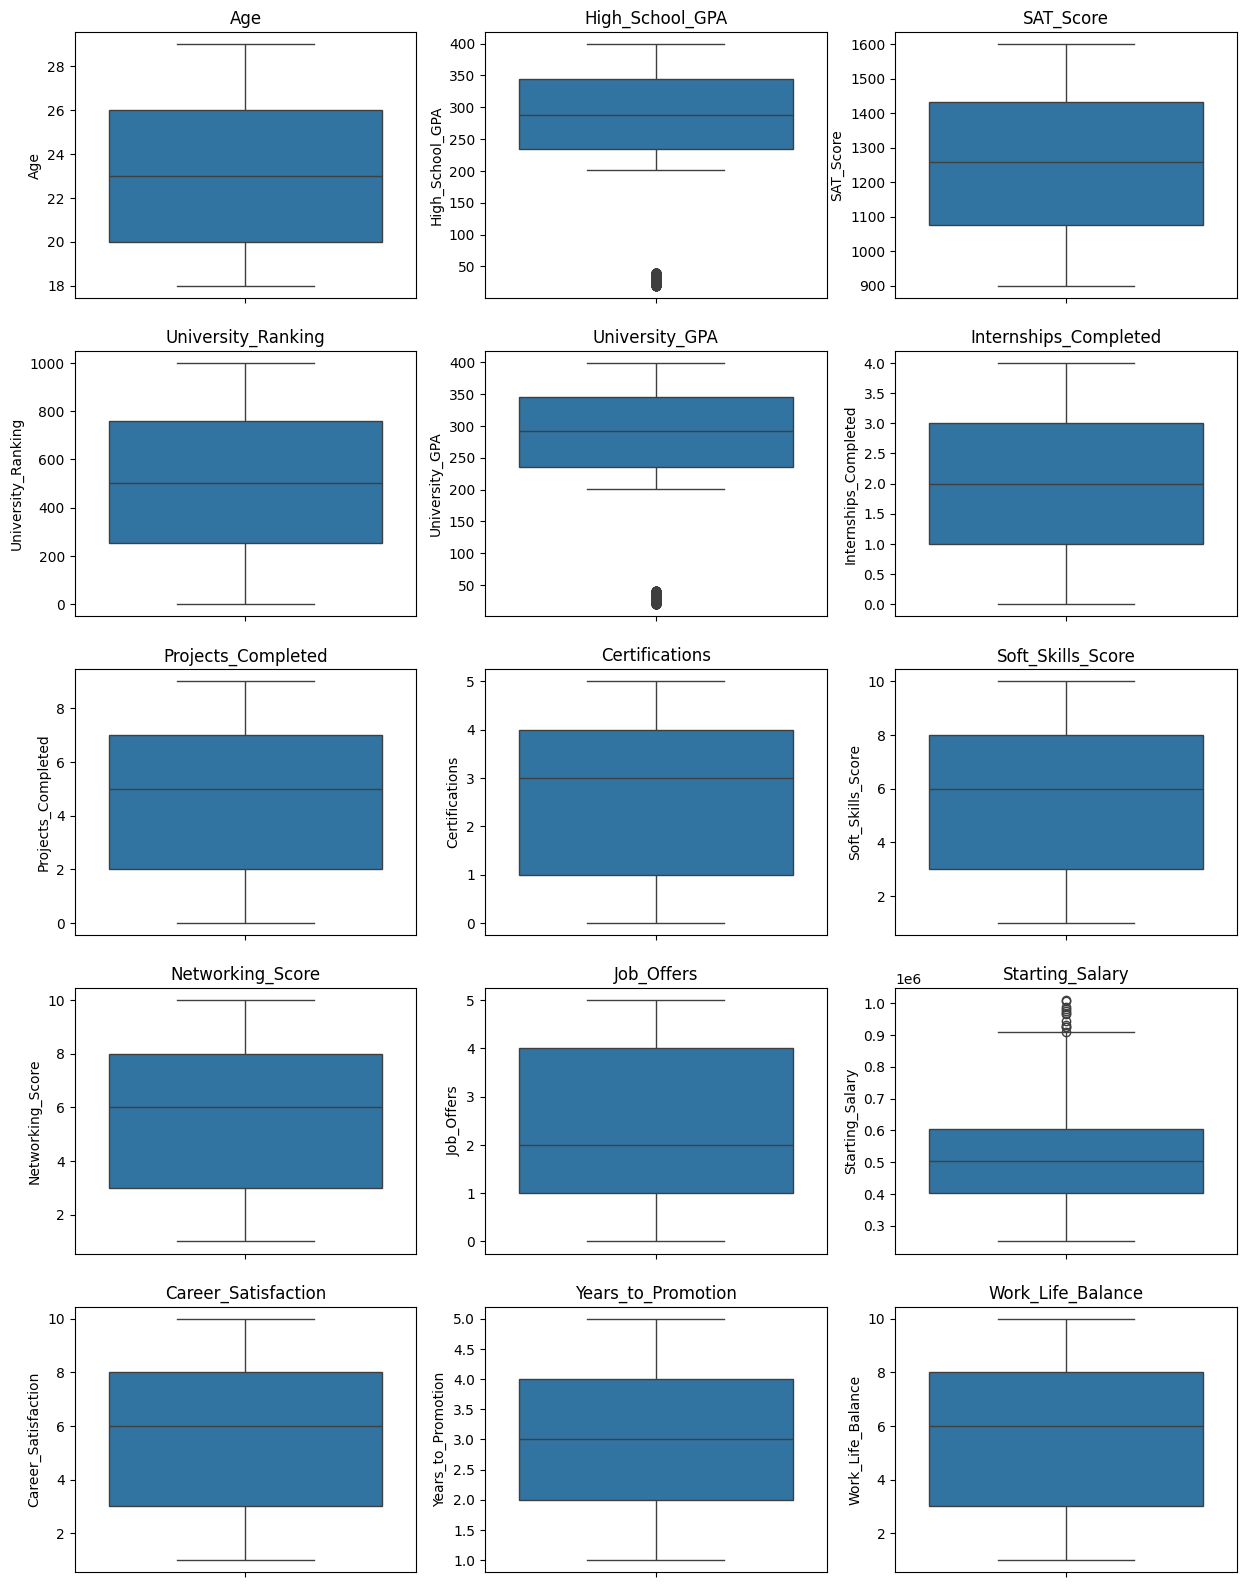

In [15]:
Educacion_numerica_df = Educacion_df.select_dtypes(include=['float', 'int'])

n_cols = 3
n_rows = (len(Educacion_numerica_df.columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 20))

for i, column in enumerate(Educacion_numerica_df.columns):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(data = Educacion_numerica_df[column], ax = axes[row, col])
    axes[row, col].set_title(column)

In [16]:
#Se remueven los outliers para una mejor interpretacion de los datos
Educacion_df = Educacion_df[Educacion_df['Starting_Salary'] < Educacion_df['Starting_Salary'].mean() + 3 * Educacion_df['Starting_Salary'].std()]

## **EDA (Analisis exploratorio de datos)**

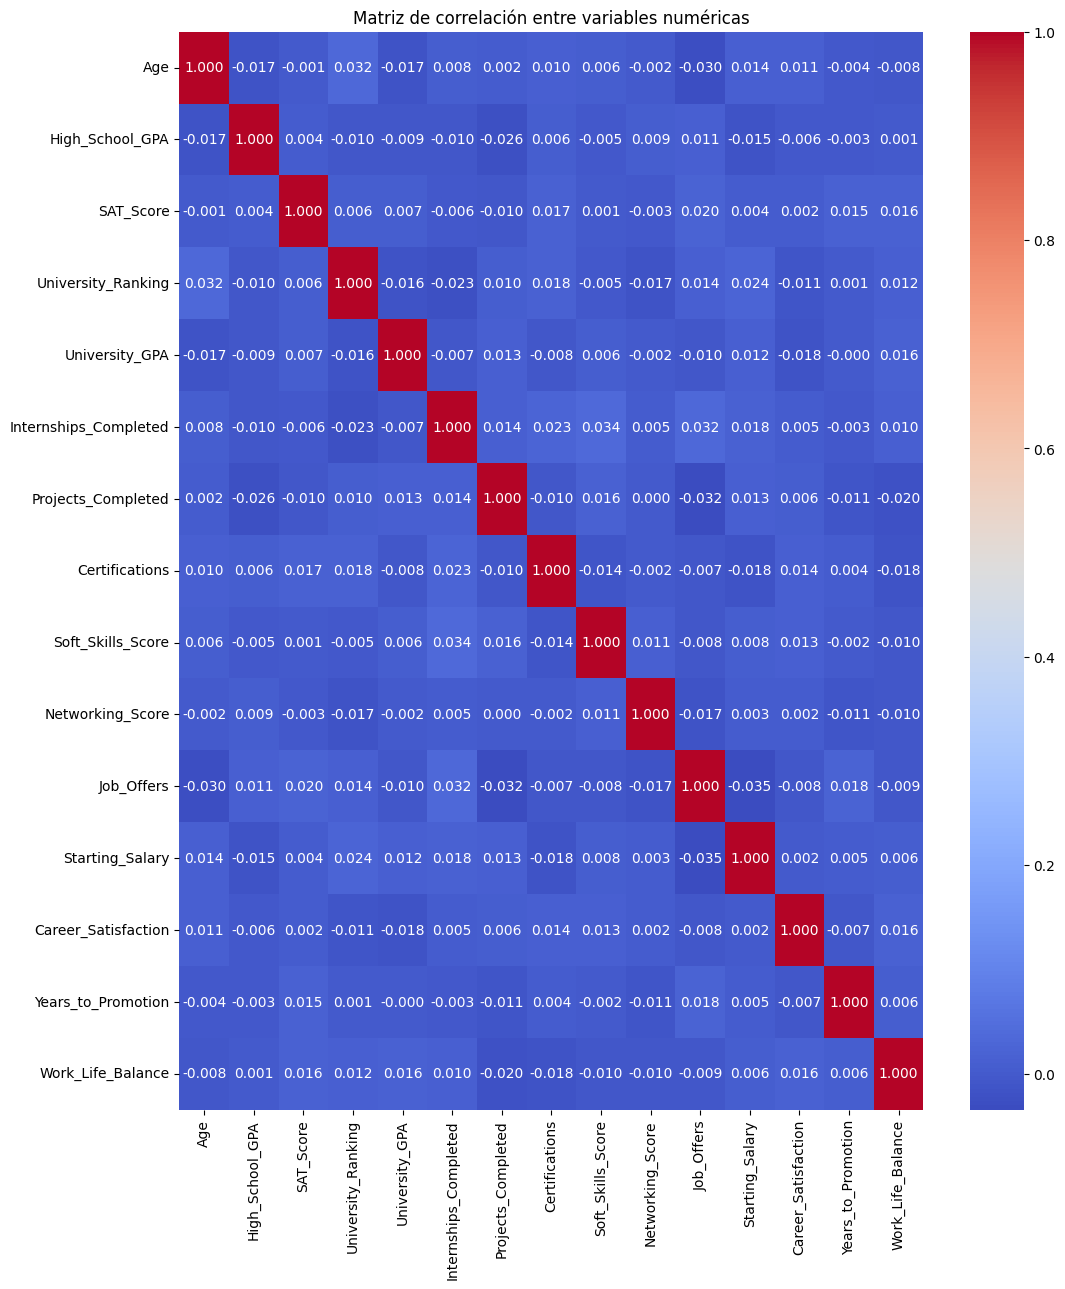

In [17]:
fig = plt.figure(figsize = (12, 14))
Educacion_numerica_df= Educacion_df.select_dtypes(include=['float', 'int'])
sns.heatmap(Educacion_numerica_df.corr(), annot = True, fmt=".3f", cmap="coolwarm",)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

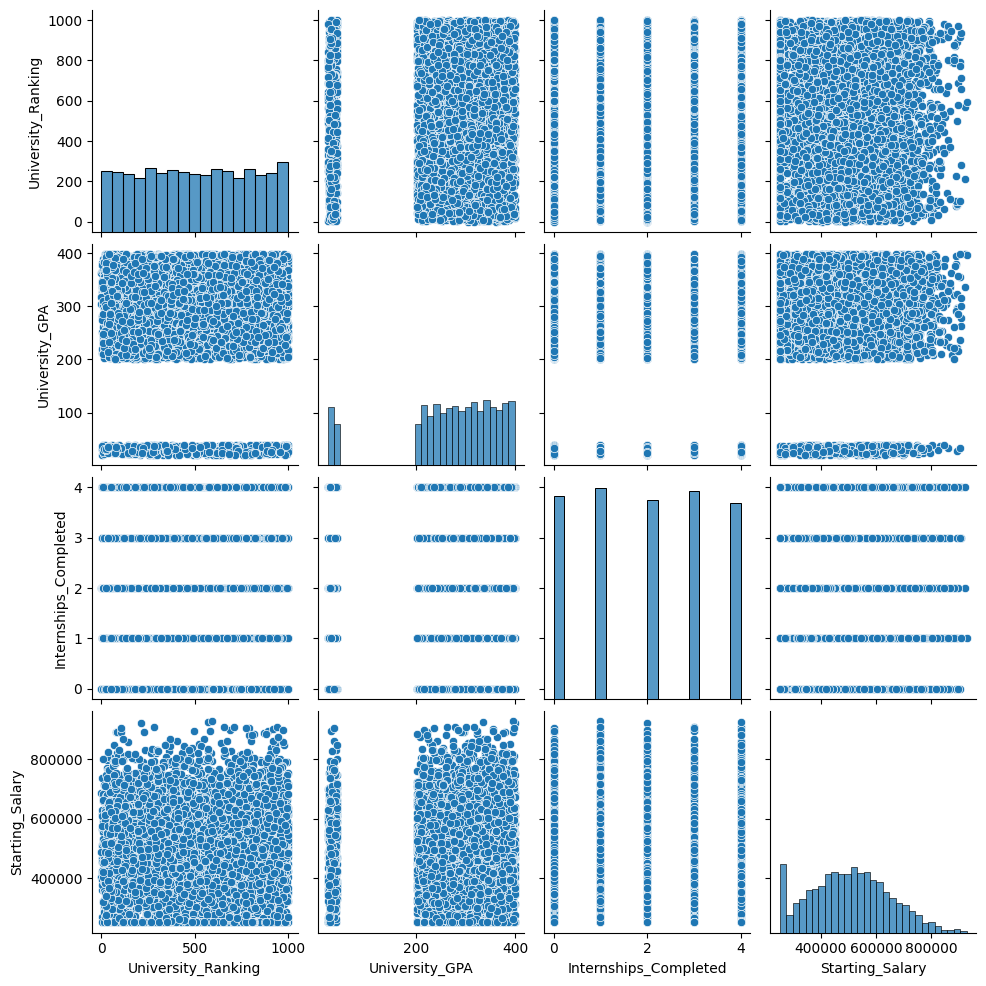

In [18]:
sns.pairplot(Educacion_df[['University_Ranking', 'University_GPA', 'Internships_Completed', 'Starting_Salary']])
plt.show()

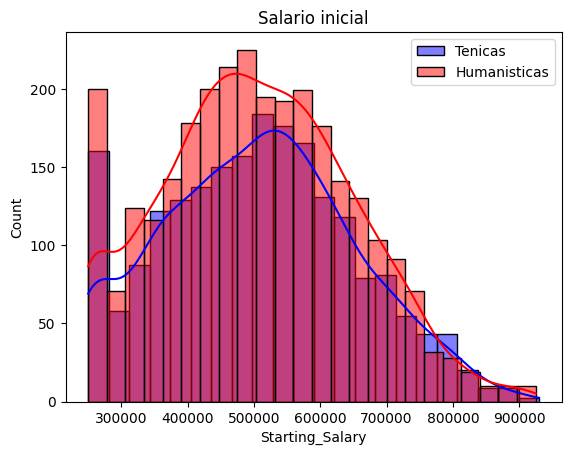

In [19]:
Tecnicas = Educacion_df[Educacion_df['Field_of_Study'].isin(['Computer Science', 'Mathematics', 'Engineering'])]['Starting_Salary']
Humanisticas = Educacion_df[Educacion_df['Field_of_Study'].isin(['Arts', 'Law', 'Medicine', 'Business'])]['Starting_Salary']
sns.histplot(Tecnicas, color='blue', label='Tenicas', kde=True)
sns.histplot(Humanisticas, color='red', label='Humanisticas', kde=True)
plt.legend()
plt.title('Salario inicial')
plt.show()

In [20]:
p_value_mannwhitney = stats.mannwhitneyu(Tecnicas, Humanisticas)
print(p_value_mannwhitney)

MannwhitneyuResult(statistic=3069741.0, pvalue=0.58723349144857)


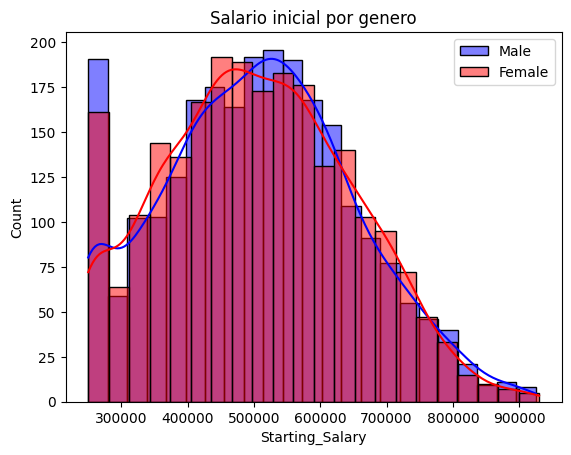

In [21]:
Educacion_df = Educacion_df[Educacion_df['Gender'].isin(['Male', 'Female'])]

Salario_hombre = Educacion_df[Educacion_df['Gender'] == 'Male']['Starting_Salary']
Salario_mujer = Educacion_df[Educacion_df['Gender'] == 'Female']['Starting_Salary']

sns.histplot(Salario_hombre, color='blue', label='Male', kde=True)
sns.histplot(Salario_mujer, color='red', label='Female', kde=True)
plt.legend()
plt.title('Salario inicial por genero')
plt.show()

In [22]:
p_value_mannwhitney = stats.mannwhitneyu(Salario_hombre, Salario_mujer)
print(p_value_mannwhitney)

MannwhitneyuResult(statistic=2890673.0, pvalue=0.8203215280258793)


## **Interpretacion y analisis de resultados**

*Observaciones de lo realizado hasta el momento:*

* Cuantas más pasantías tenga un estudiante, mayor será su salario inicial. Esto confirma que la experiencia laboral durante los estudios tiene un efecto positivo en las perspectivas de carrera.
* Hay una distribución uniforme, lo que sugiere que un alto ranking universitario no siempre garantiza un alto promedio académico entre los estudiantes.
* La mayoría de los graduados reciben un salario inicial en el rango de 40,000 a 75,000
* Los estudiantes de universidades más prestigiosas (con un valor de University_Ranking más bajo) tienden a obtener salarios iniciales más altos, pero la relación no es lineal, ya que existe una gran variabilidad.
* A pesar de que visualmente parece que existe una diferencia entre los salarios de los graduados de carreras tecnicas vs humanisticas, se obtuvo un valor p = 0,59. Por lo tanto, no hay motivos para rechazar H0, lo que significa que los salarios iniciales promedio entre los estudiantes de humanidades y técnicos son iguales.
* Siendo que el valor de p es de 0.82 para el grafico de salarios iniciales por genero, no podemos decir que los salarios son distintos en conclusion los salarios son iguales.




